# Import Modules

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [2]:
dataset_folder = r"C:\Users\RENU\Downloads\archive (13)\Face Mask Dataset"
training_folder = dataset_folder + '\Train'
testing_folder = dataset_folder + '\Test'

<>:2: SyntaxWarning: invalid escape sequence '\T'
<>:3: SyntaxWarning: invalid escape sequence '\T'
<>:2: SyntaxWarning: invalid escape sequence '\T'
<>:3: SyntaxWarning: invalid escape sequence '\T'
C:\Users\RENU\AppData\Local\Temp\ipykernel_2932\2454026002.py:2: SyntaxWarning: invalid escape sequence '\T'
  training_folder = dataset_folder + '\Train'
C:\Users\RENU\AppData\Local\Temp\ipykernel_2932\2454026002.py:3: SyntaxWarning: invalid escape sequence '\T'
  testing_folder = dataset_folder + '\Test'


## Making Training Dataset With The Help Of Image Data Generator Class

In [3]:
training_image_gen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=25,rescale=1/255)

In [4]:
training_dataset = training_image_gen.flow_from_directory(training_folder,class_mode='categorical',target_size=(150,150))

Found 10000 images belonging to 2 classes.


## Making Testing Dataset With The Help Of Image Data Generator Class

In [5]:
testing_image_gen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=25,rescale=1/255)

In [6]:
testing_dataset = testing_image_gen.flow_from_directory(testing_folder,class_mode='categorical',target_size=(150,150))

Found 992 images belonging to 2 classes.


# Building CNN Layers For Feature Extraction

In [7]:
face_mask_model = tf.keras.Sequential()

face_mask_model.add(Conv2D(14,(6,6),activation='relu',input_shape=(150,150,3)))
face_mask_model.add(Conv2D(32,(3,3),activation='relu'))

face_mask_model.add(MaxPool2D((3,3)))

face_mask_model.add(Conv2D(64,(2,2),activation='relu'))

C:\Users\RENU\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Flatting Our Image

In [8]:
face_mask_model.add(tf.keras.layers.Flatten())

# Giving To ANN

In [9]:
face_mask_model.add(tf.keras.layers.Dense(units=128, activation = 'relu'))
face_mask_model.add(tf.keras.layers.Dropout(0.5))

face_mask_model.add(tf.keras.layers.Dense(units=64, activation = 'relu'))

face_mask_model.add(tf.keras.layers.Dense(units=64, activation = 'relu'))
face_mask_model.add(tf.keras.layers.Dropout(0.5))

face_mask_model.add(tf.keras.layers.Dense(2, activation = "softmax"))

In [10]:
face_mask_model.compile(optimizer=Adam(learning_rate=0.002),loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
face_mask_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 145, 145, 14)        │           1,526 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 143, 143, 32)        │           4,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 47, 47, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 46, 46, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 135424)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      17,334,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,360,792 (66.23 MB)

 Trainable params: 17,360,792 (66.23 MB)

 Non-trainable params: 0 (0.00 B)

# Training Our Model

In [12]:
face_mask_model.fit(training_dataset,validation_data = testing_dataset,epochs=12,callbacks=[EarlyStopping(patience=3)])

C:\Users\RENU\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 182s 572ms/step - accuracy: 0.7570 - loss: 0.7440 - val_accuracy: 0.8558 - val_loss: 0.3182
Epoch 2/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 516s 2s/step - accuracy: 0.8956 - loss: 0.2857 - val_accuracy: 0.8982 - val_loss: 0.2847
Epoch 3/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 122s 390ms/step - accuracy: 0.9047 - loss: 0.2686 - val_accuracy: 0.9153 - val_loss: 0.2245
Epoch 4/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 123s 391ms/step - accuracy: 0.9122 - loss: 0.2290 - val_accuracy: 0.9143 - val_loss: 0.2408
Epoch 5/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 121s 385ms/step - accuracy: 0.9210 - loss: 0.2160 - val_accuracy: 0.9335 - val_loss: 0.1981
Epoch 6/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 120s 384ms/step - accuracy: 0.9215 - loss: 0.2127 - val_accuracy: 0.8911 - val_loss: 0.2598
Epoch 7/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 118s 376ms/step - accuracy: 0.9156 - loss: 0.2265 - val_accuracy: 0.9304 - val_loss: 0.1999
Epoch 8/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 888s 3s/step - accuracy: 0.9409 - loss:

## Storing The Model History

In [14]:
report = face_mask_model.history.history

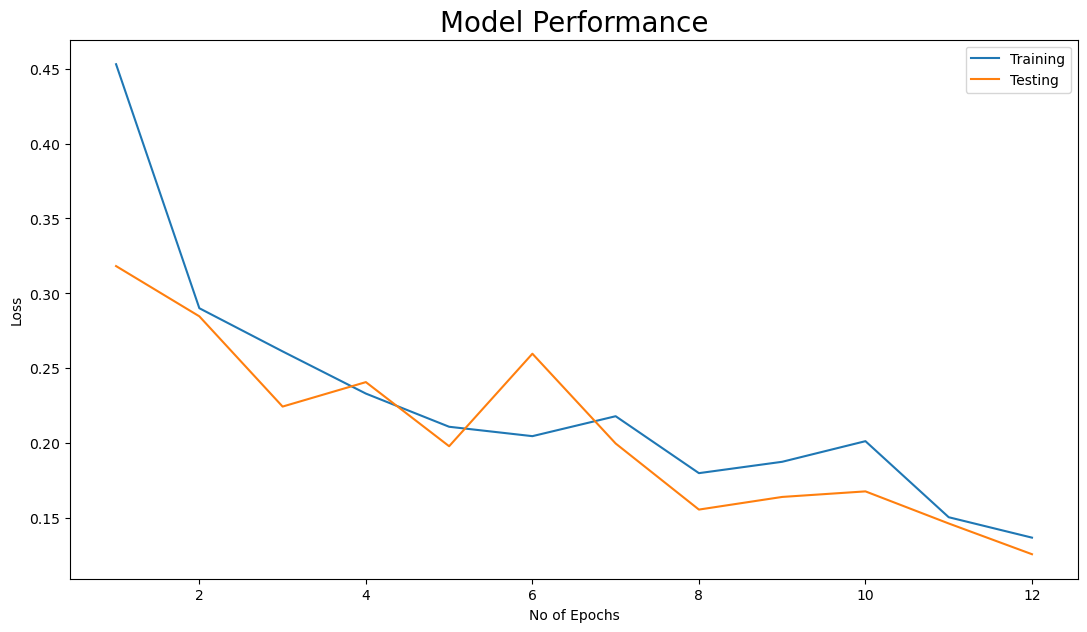

In [17]:
plt.figure(figsize=(13,7))
plt.plot(range(1,13),report['loss'],label='Training')
plt.plot(range(1,13),report['val_loss'],label='Testing')
plt.legend()
plt.title('Model Performance',size=20)
plt.xlabel('No of Epochs')
plt.ylabel('Loss')
plt.show()

In [18]:
tf.keras.models.save_model(face_mask_model,'Face Detection Model (new).h5')